In [3]:
import pandas as pd
import seaborn as sns
import matplotlib
import os

documents = []
for doc in os.listdir("training_data"):
    if doc.endswith("ing.csv"):
        documents.append(pd.read_csv("training_data/"+doc))

all_vectors = pd.concat(documents)
#documents[0][15:18]
len(documents), len(all_vectors)

#Last (81, 110525) : 81 docs :/
#Current (125, 174927)

(125, 174927)

In [4]:
# Place features in X and types in Y

def get_features(vectors):
    return vectors.drop('type', axis=1)

def get_types(vectors):
    return vectors['type']

def pd_to_dict_list(data):
    return data.to_dict('records')
    #return data.values.tolist()

def pd_type_column_to_string_list(data):
     return [ x for x in data ]

X_pd = get_features(all_vectors)
y_pd = get_types(all_vectors)

X_doc_list = [ pd_to_dict_list(get_features(doc)) for doc in documents ]
y_doc_list = [ pd_type_column_to_string_list(get_types(doc)) for doc in documents ]

X_doc_list[0][52], y_doc_list[0][52]

({'awerage_word_length': 1.0,
  'boldness_first_word': 0.0,
  'formuleness': 0.0,
  'heading_first_word': False,
  'is_capital_first_letter': False,
  'italicness': 0.0,
  'proof_first_word': False,
  'words_num': 1},
 'text')

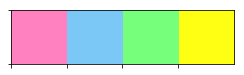

In [3]:
# Plot palette
col_list = ["pink", "lightblue", "lightgreen", "yellow"]
sns.palplot(sns.xkcd_palette(col_list))

In [ ]:
# Plot
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette)
sns.set_context("paper", rc={"axes.labelsize":45})
plot=sns.pairplot(
    data=all_vectors, hue="type",
    plot_kws = {'alpha': 0.3, 'edgecolor': 'k'},
    markers = ["+", "o", "s", "D"],
    height=10)
plot._legend.get_title().set_fontsize(45)
plot

In [ ]:
# Save plot
plot.savefig("plots/lines_plot_28_with_proof.png")

In [5]:
# Separating data to training and test for all_vectors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.3)
# Trying Naive Bayes Classification on lines
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data
y_model_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print "Test data"
print classification_report(y_test, y_model)
print "Training data"
print classification_report(y_train, y_model_train)

Test data
             precision    recall  f1-score   support

 after_body       0.35      0.19      0.25      1056
       body       0.42      0.42      0.42      3462
    heading       0.45      0.65      0.53      1133
       text       0.94      0.93      0.94     46828

avg / total       0.88      0.88      0.88     52479

Training data
             precision    recall  f1-score   support

 after_body       0.35      0.18      0.24      2399
       body       0.43      0.41      0.42      8335
    heading       0.45      0.66      0.53      2532
       text       0.93      0.94      0.94    109182

avg / total       0.88      0.88      0.88    122448



In [18]:
# Separating data to training and test for documents
X_train, X_test, y_train, y_test = train_test_split(X_doc_list, y_doc_list, test_size=0.3)

import pycrfsuite
trainer = pycrfsuite.Trainer(verbose=True)

#TODO: debug!!!

# Submit training data to the trainer
for xseq, yseq in zip(X_train, y_train):
    trainer.append(xseq, yseq)

# Set the parameters of the model
trainer.set_params({
    # coefficient for L1 penalty
    'c1': 0.18,

    'c2': 0.01,  

    # maximum number of iterations
    'max_iterations': 100,

    # whether to include transitions that
    # are possible, but not observed
    'feature.possible_transitions': True
})

# Save the model to the file
trainer.train('crf.model')

Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 44
Seconds required: 0.025

L-BFGS optimization
c1: 0.180000
c2: 0.010000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

***** Iteration #1 *****
Loss: 74364.152499
Feature norm: 0.500000
Error norm: 91479.171226
Active features: 44
Line search trials: 2
Line search step: 0.000001
Seconds required for this iteration: 0.088

***** Iteration #2 *****
Loss: 67665.356632
Feature norm: 0.442061
Error norm: 85749.603792
Active features: 40
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.032

***** Iteration #3 *****
Loss: 38604.830999
Feature norm: 0.786124
Error norm: 32004.735063
Active features: 34
Line search trials: 1
Line search step: 1.000000
Seconds required for this iterat

***** Iteration #39 *****
Loss: 12464.685788
Feature norm: 12.464473
Error norm: 2216.971117
Active features: 44
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.033

***** Iteration #40 *****
Loss: 12446.154852
Feature norm: 12.560481
Error norm: 3491.893867
Active features: 44
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.034

***** Iteration #41 *****
Loss: 12420.548418
Feature norm: 12.921131
Error norm: 7956.118583
Active features: 44
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.034

***** Iteration #42 *****
Loss: 12404.204274
Feature norm: 13.190086
Error norm: 5785.234632
Active features: 44
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.033

***** Iteration #43 *****
Loss: 12391.539938
Feature norm: 13.304735
Error norm: 5443.389236
Active features: 44
Line search trials: 1
Line search step: 1.000000
Seconds requir

***** Iteration #81 *****
Loss: 12193.702649
Feature norm: 13.468448
Error norm: 1287.338358
Active features: 43
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.031

***** Iteration #82 *****
Loss: 12192.827630
Feature norm: 13.467291
Error norm: 721.114244
Active features: 44
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.033

***** Iteration #83 *****
Loss: 12192.353502
Feature norm: 13.467574
Error norm: 3632.445137
Active features: 44
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.032

***** Iteration #84 *****
Loss: 12191.078679
Feature norm: 13.468054
Error norm: 633.454778
Active features: 43
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.033

***** Iteration #85 *****
Loss: 12190.079221
Feature norm: 13.472588
Error norm: 2458.524409
Active features: 43
Line search trials: 1
Line search step: 1.000000
Seconds required

In [7]:
# Trying Conditional Randomf Fields
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

#TODO: debug!!!

# Separating data to training and test
X_train, X_test, y_train, y_test = train_test_split(X_doc_list, y_doc_list, test_size=0.3)

# Set the parameters of the model
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
        
    c1 = 0.189,
    c2 = 0.017,
    
    max_iterations=100,
    
    # whether to include transitions that
    # are possible, but not observed
    all_possible_transitions=True
)

crf.fit(X_train, y_train)
y_pred_train = crf.predict(X_train)
y_pred_test = crf.predict(X_test)

print("Training on the training part")
print(metrics.flat_classification_report(y_train, y_pred_train, digits=6))
print("Training on the test part")
print(metrics.flat_classification_report(y_test, y_pred_test, digits=6))

Training on the training part
             precision    recall  f1-score   support

 after_body   0.471328  0.255864  0.331675      2345
       body   0.713384  0.368692  0.486138      7966
    heading   0.784661  0.424242  0.550725      2508
       text   0.928831  0.983886  0.955566    102457

avg / total   0.901499  0.914388  0.901627    115276

Training on the test part
             precision    recall  f1-score   support

 after_body   0.370787  0.148649  0.212219      1110
       body   0.638992  0.225007  0.332819      3831
    heading   0.720930  0.294728  0.418405      1157
       text   0.921041  0.986929  0.952847     53553

avg / total   0.888806  0.908971  0.888879     59651



In [35]:

# Takes time!

#crf=rs.best_estimator_
params_space = {
    'c1': scipy.stats.expon(scale=0.5),
    'c2': scipy.stats.expon(scale=0.05),
}

labels = ['heading', 'body', 'after_body']

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=labels)

# search
rs = RandomizedSearchCV(crf, params_space,
                        cv=3,
                        verbose=1,
                        n_jobs=-1,
                        n_iter=50,
                        scoring=f1_scorer)

rs.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  6.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=CRF(algorithm='lbfgs', all_possible_states=None,
  all_possible_transitions=True, averaging=None, c=None, c1=0.18, c2=0.017,
  calibration_candidates=None, calibration_eta=None,
  calibration_max_trials=None, calibration_rate=None,
  calibration_samples=None, delta=None, epsilon=None, erro...e,
  num_memories=None, pa_type=None, period=None, trainer_cls=None,
  variance=None, verbose=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'c2': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f001c45b310>, 'c1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f001e9cae10>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(flat_f1_score, average=weighted, labels=['heading', 'body', 'after_body']),
          verbose=1)

In [36]:
#previous: 0.18, 0.017
#last: {'c1': 0.28900203043076822, 'c2': 0.015259555421089956}

rs.best_params_
#rs.best_score_

{'c1': 0.28900203043076822, 'c2': 0.015259555421089956}

In [8]:
from collections import Counter

def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))

print("Top positive:")
print_state_features(Counter(crf.state_features_).most_common(30))

print("\nTop negative:")
print_state_features(Counter(crf.state_features_).most_common()[-30:])


Top positive:
3.794421 heading  boldness_first_word
2.280844 after_body proof_first_word
0.774719 body     italicness
0.706098 heading  is_capital_first_letter
0.614433 after_body is_capital_first_letter
0.586618 heading  heading_first_word
0.425271 heading  italicness
0.329523 text     proof_first_word
0.228037 heading  formuleness
0.182641 body     formuleness
0.137223 after_body heading_first_word
0.058656 after_body awerage_word_length
0.047295 text     awerage_word_length
0.018272 body     words_num
-0.017730 body     awerage_word_length
-0.021302 text     words_num
-0.048464 heading  words_num
-0.077775 text     formuleness
-0.088227 text     is_capital_first_letter
-0.106635 heading  awerage_word_length
-0.109222 after_body words_num
-0.150234 body     heading_first_word
-0.171318 text     boldness_first_word
-0.275224 text     heading_first_word
-0.275717 after_body formuleness
-0.380955 after_body boldness_first_word
-0.396043 after_body italicness
-0.408478 body     is_capita

In [9]:
import matplotlib.pyplot as plt

_x = [s.parameters['c1'] for s in rs.grid_scores_]
_y = [s.parameters['c2'] for s in rs.grid_scores_]
_c = [s.mean_validation_score for s in rs.grid_scores_]

fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_title("Randomized Hyperparameter Search CV Results (min={:0.3}, max={:0.3})".format(
    min(_c), max(_c)
))

ax.scatter(_x, _y, c=_c, s=60, alpha=0.9, edgecolors=[0,0,0])

print("Dark blue => {:0.4}, dark red => {:0.4}".format(min(_c), max(_c)))

NameError: name 'rs' is not defined

In [10]:

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-20:])

Top likely transitions:
text   -> text    2.128874
body   -> after_body 1.537372
body   -> body    1.361033
heading -> body    0.563546
after_body -> text    0.271098
text   -> heading 0.190134
heading -> after_body -0.355648
body   -> heading -1.308620
text   -> body    -1.380386
after_body -> heading -1.655558
body   -> text    -1.783918
after_body -> body    -2.809488
heading -> heading -3.170767
heading -> text    -3.681376
after_body -> after_body -5.007393
text   -> after_body -7.942680

Top unlikely transitions:
text   -> text    2.128874
body   -> after_body 1.537372
body   -> body    1.361033
heading -> body    0.563546
after_body -> text    0.271098
text   -> heading 0.190134
heading -> after_body -0.355648
body   -> heading -1.308620
text   -> body    -1.380386
after_body -> heading -1.655558
body   -> text    -1.783918
after_body -> body    -2.809488
heading -> heading -3.170767
heading -> text    -3.681376
after_body -> after_body -5.007393
text   -> after_body -7.942680


In [62]:
len(y_train), len(y_test)

(56, 25)